In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653251547.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,-43.969143,-61.226874,66.572519
1,11.296003,-32.289698,85.724099
2,-89.712925,65.202964,71.493042
3,-31.331350,1.970414,74.493419
4,82.627843,-46.925072,73.585882
5,-83.754996,-34.302191,82.900559
6,-6.812942,15.095813,82.101202
7,-31.220713,81.090264,50.539744
8,-16.616223,-62.637947,85.257044
9,39.609293,-53.343449,83.464654


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]
j_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(len_)]
j_data['Capacity'] = [r.randrange(500, 1000) for _ in range(len_)]

j_data.head(10)

,X,Y,Fixed Charge,Capacity
0,-79.497988,59.114951,9291.135291,707
1,23.388652,2.636498,5487.590505,760
2,-37.435378,-50.201615,8457.885335,500
3,86.303740,-17.229084,6458.113490,888
4,-71.854484,-43.505697,7611.074197,701
5,-6.766412,80.823280,6988.976652,789
6,97.420495,10.393416,5949.020255,636
7,-84.682528,-85.271102,9220.783694,884
8,24.347945,-49.901494,7365.248362,591
9,21.998496,-26.899293,8036.257816,956


Text(0.5, 1.0, 'Customer and Facility Locations')

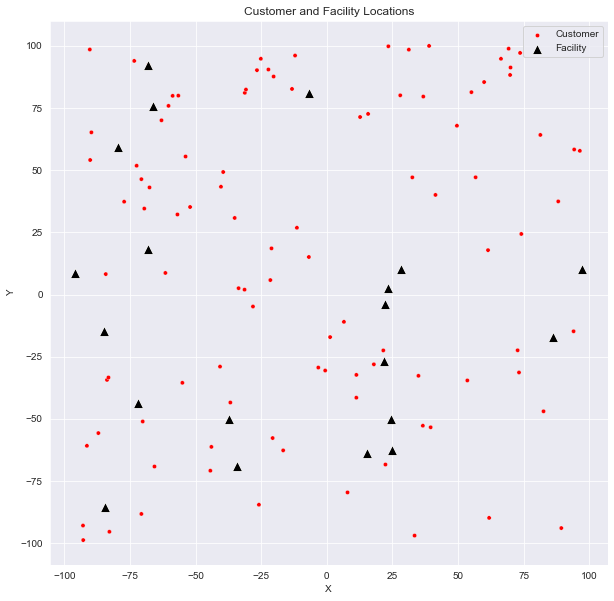

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[125.47690497,  92.82027215,  12.81586609, ...,  68.83966716, 155.40838102,  87.1347415 ],
       [128.83461749,  36.96040209,  51.9190169 , ...,  33.23314803, 147.77561503, 114.80219779],
       [ 11.89154526, 129.25374084, 126.69316789, ..., 171.66093309,  34.58233626,  56.8262701 ],
       ...,
       [169.11899039,  73.58933965, 153.2069198 , ..., 118.44973742, 165.7619306 , 186.38551741],
       [ 70.30953099,  87.99792979, 135.03359968, ..., 150.19057367,  55.79601176, 110.91874729],
       [160.99340249,  84.5772849 , 164.94270229, ..., 138.84123656, 152.23588594, 185.81483891]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
